In [1]:
import os

In [2]:
data_dir = '..\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread

In [7]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

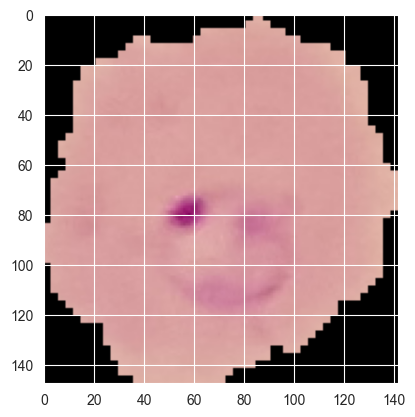

In [14]:
para_cell = train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'
plt.imshow(imread(para_cell))

In [16]:
os.listdir(train_path + 'uninfected\\')[0]


'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [22]:
uninfected_cell = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [23]:
uninfected_cell = imread(uninfected_cell)

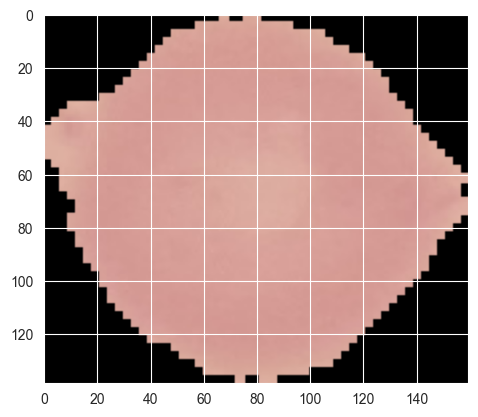

In [24]:
plt.imshow(uninfected_cell)

In [25]:
pwd

'C:\\dev\\AI-playground\\CNN'

In [27]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'uninfected'):
    img = imread(test_path + 'uninfected\\' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [28]:
image_shape = (130, 130, 3)

In [29]:
np.mean(dim1)

130.92538461538462

In [30]:
np.mean(dim2)

130.75

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more infor

In [34]:
imread(para_cell).max() # no need to normalize, if normalized then divide by 255

0.9098039

In [35]:
image_gen = ImageDataGenerator(rotation_range = 20, width_shift_range=0.1, height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')

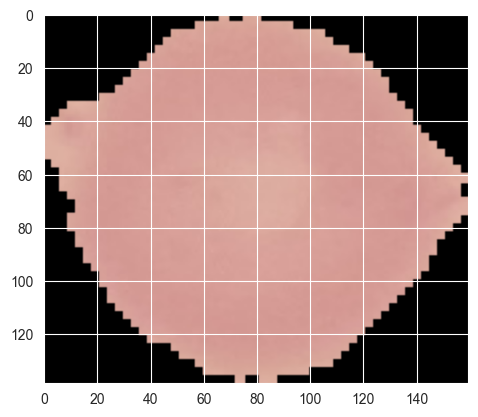

In [36]:
plt.imshow(uninfected_cell)

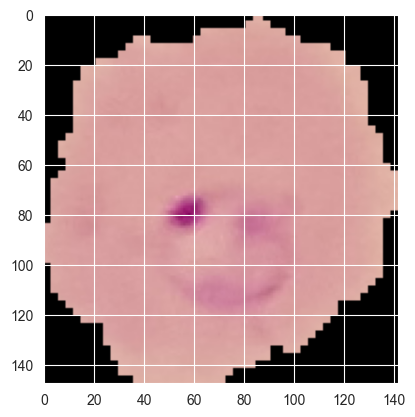

In [38]:
para_img = imread(para_cell)
plt.imshow(imread(para_cell))

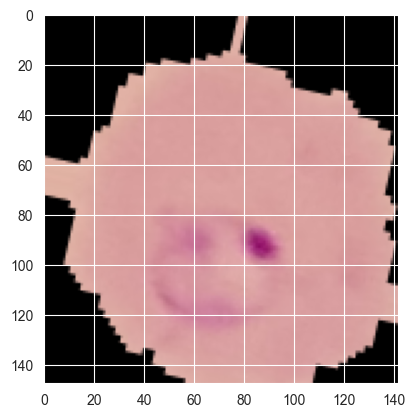

In [40]:
plt.imshow(image_gen.random_transform(para_img))

In [55]:
train_image_gen = image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [56]:
test_image_gen = image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [48]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)       

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [53]:
batch_size=16

In [59]:
image_shape[:2]

(130, 130)

In [60]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [61]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [62]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [63]:
results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

C:\Users\modki\AppData\Local\Temp\ipykernel_9812\3669551767.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])


Epoch 1/20
1560/1560 [==============================] - 318s 203ms/step - loss: 0.9183 - accuracy: 0.5466 - val_loss: 0.6761 - val_accuracy: 0.5712
Epoch 2/20
1560/1560 [==============================] - 163s 105ms/step - loss: 0.6795 - accuracy: 0.5755 - val_loss: 0.6723 - val_accuracy: 0.6015
Epoch 3/20
1560/1560 [==============================] - 156s 100ms/step - loss: 0.6763 - accuracy: 0.5861 - val_loss: 0.6718 - val_accuracy: 0.5808
Epoch 4/20
1560/1560 [==============================] - 157s 101ms/step - loss: 0.6707 - accuracy: 0.5994 - val_loss: 0.6618 - val_accuracy: 0.6173
Epoch 5/20
1560/1560 [==============================] - 159s 102ms/step - loss: 0.6011 - accuracy: 0.6755 - val_loss: 0.2676 - val_accuracy: 0.9131
Epoch 6/20
1560/1560 [==============================] - 159s 102ms/step - loss: 0.2181 - accuracy: 0.9320 - val_loss: 0.2267 - val_accuracy: 0.9162
Epoch 7/20
1560/1560 [==============================] - 162s 104ms/step - loss: 0.1909 - accuracy: 0.9425 - val_